In [11]:
import pandas as pd
import numpy as np
import numpy.matlib
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss 
import matplotlib.pyplot as plt

In [12]:
'''feature scaling to use Z-score
    @name feature_scaling
    @pram array, array
    @retern array, array'''
def feature_scaling(X_train, X_test):
    scaler = StandardScaler().fit(X_train)
    return scaler.transform(X_train), scaler.transform(X_test)

'''minkowski distance
    @name minkowski_distance
    @pram array, array
    @retern double'''
def minkowski_distance(v1, v2):
    return np.sum(abs(v1-v2))

'''euclidean distance
    @name euclidean_distance
    @pram array, array
    @retern double'''
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

'''cosine distance
    @name cosine_distance
    @pram array, array
    @retern double'''
def cosine_distance(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v2)) * np.sqrt(np.dot(v1, v2)))

'''KNN learning
    @name get_KNN_matrix
    @pram array, array, array
    @retern matrix'''
def get_KNN_matrix(X_train, y_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train), 2))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            distance_matrix[i][j][0], distance_matrix[i][j][1] = euclidean_distance(X_test[i], X_train[j]), y_train[j]
    return distance_matrix

'''KNN test
    @name result_KNN_accuracy
    @pram int, matrix, array
    @retern double'''
def result_KNN_accuracy(k, matrix, y_test):
    if k%2==0:
        return -1
    else:
        temp, accept = [0,0,0,0,0,0,0,0,0,0], 0
        confusion_matrix = np.zeros((len(temp), len(temp)))
        for i in range(len(matrix)):
            for j in range(k):
                temp[int(matrix[i][j][1])]+=1
            if temp.index(max(temp))==y_test[i]:
                accept+=1
            temp=[0,0,0,0,0,0,0,0,0,0]
        return accept/len(y_test)

'''get KNN confusion matrix
    @name KNN_confusion_matrix
    @pram int, matrix, array
    @retern matrix'''
def KNN_confusion_matrix(k, matrix, y_test):
    if k%2==0:
        return -1
    else:
        confusion_matrix = np.zeros((10, 10))
        for i in range(len(matrix)):
            for j in range(k):
                confusion_matrix[y_test[i]][int(matrix[i][j][1])]+=1
        return confusion_matrix

# Main

In [3]:
# read data
trainData = pd.read_csv("MNIST_training.csv")
testData = pd.read_csv("MNIST_test.csv")

# split X and y
X_train, y_train = trainData.drop('label', axis=1), trainData.iloc[:, 0]
X_test, y_test = testData.drop('label', axis=1), testData.iloc[:, 0]

# feature scaling
X_train, X_test = feature_scaling(X_train, X_test)

# get matrix
test_matrix = get_KNN_matrix(X_train, y_train, X_test)

# sort the matrix
for i in range(len(test_matrix)):
    test_matrix[i] = test_matrix[i][test_matrix[i][:, 0].argsort()]



Best score is  0.92 
Best k is  3


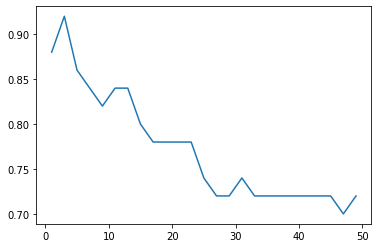

In [13]:
# Result
best_score=0
best_k = 0
scores_list=[]
range_num = range(1,51,2)
for i in range_num:
    accuracy = result_KNN_accuracy(i, test_matrix, y_test)
    if best_score <= accuracy:
        best_score,best_k = accuracy, i
    scores_list.append(accuracy)
print("Best score is ", best_score, "\nBest k is ", best_k)
plt.plot(range_num, scores_list)

In [9]:
KNN_confusion_matrix(best_k, test_matrix, y_test)

array([[14.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6.,  1.,  2.,  0.,  0.,  2.,  4.,  0.],
       [ 0.,  0.,  0., 10.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  9.,  1.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  3.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., 14.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 14.]])